In [90]:
import numpy
import scipy

class neuralNetwork:
    # 初始化函数
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 输入层节点数，隐藏层节点数。输出层节点数
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        # 学习率
        self.lr = learningrate
        # 生成权重矩阵，这里平方0.5是为了得到0-1之间的数
        # 输入层与隐藏层之间的权重矩阵
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        # 隐藏层与输出层之间的权重矩阵
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        # 定义匿名函数（激活函数）
        self.activation_function = lambda x: scipy.special.expit(x)
    # 训练函数
    def train(self, inputs_list, targets_list):
        # 输入的节点，和目标节点
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    # 查询函数
    def query(self, inputs_list):
        # 输入的节点
        inputs = numpy.array(inputs_list, ndmin=2).T
        # 隐藏层乘以权重输出的节点（进行激活函数前）
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 隐藏层输出节点（进行激活函数后）
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 最终乘以权重输出的节点（进行激活函数前）
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 最终层输出节点（进行激活函数后）
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
        
    
# 输入层节点，隐藏层节点。输出层节点
inputnodes = 784
hiddennodes = 100
outputnodes = 10
# 学习率
learningrate = 0.3
# 创建神经网络对象
n = neuralNetwork(inputnodes, hiddennodes, outputnodes, learningrate)
# 加载训练集
training_data_file = open('./csv/mnist_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 循环所有训练数据
for record in training_data_list: 
    # 切割逗号为数组
    all_values = record.split(',')
    # 输入节点
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 目标节点（不能使用0和1，所以使用0.01 和 0.99 表示）
    targets = numpy.zeros(outputnodes) + 0.01
    targets[int(all_values[0])] = 0.99   # 这是目标值
    n.train(inputs, targets)


In [106]:
import matplotlib.pyplot
%matplotlib inline

# 加载测试集
test_data_file = open('./csv/mnist_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
# 积分卡
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 得出结果
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    if (label == correct_label):    # 正确
        scorecard
        scorecard.append(1)
    else:                           # 错误
        scorecard
        scorecard.append(0)
print(scorecard)
scorecard_array = numpy.asarray(scorecard)
# 正确率
rate = scorecard_array.sum() / scorecard_array.size * 100
print ("正确率为 = %.0f" % (rate) + '%')

# all_values = test_data_list[0].split(',')
# print('实际结果为: ',all_values[0])
# image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
# matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
# arr = n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
# result = numpy.argmax(arr)
# print('预测结果为: ',result)
# print(arr)

7 correct label
7 network's answer
2 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
4 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer
[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
正确率为 = 60%


[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

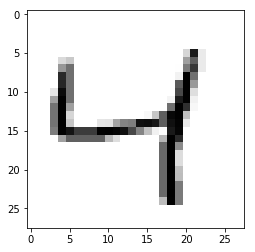

In [77]:
import numpy
import matplotlib.pyplot
%matplotlib inline

data_file = open('./csv/mnist_10.csv', 'r')
data_list = data_file.readlines()
data_file.close()
len(data_list)

all_values = data_list[2].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

# 我们需要做的第一件事情是将输入颜色值从较大的0到255的范围，缩
# 放至较小的0.01 到 1.0的范围。我们刻意选择0.01作为范围最低点，是为了
# 避免先前观察到的0值输入最终会人为地造成权重更新失败。我们没有选择
# 0.99作为输入的上限值，是因为不需要避免输入1.0会造成这个问题。我们
# 只需要避免输出值为1.0
# 将在0到255范围内的原始输入值除以255，就可以得到0到1范围的输入值。
# 然后，需要将所得到的输入乘以0.99，把它们的范围变成0.0 到0.99。
# 接下来，加上0.01，将这些值整体偏移到所需的范围0.01到1.00
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

print(scaled_input)

In [38]:
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
print(targets)

[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]


In [81]:
numpy.random.normal(0.0, pow(3, -0.5), (3, 4))

array([[-0.24291681,  0.01280878, -0.96493352,  0.19718548],
       [ 0.35465496, -0.54322577, -0.48691838,  0.19707439],
       [-0.64714373, -0.22181575,  0.5431944 ,  0.20784809]])

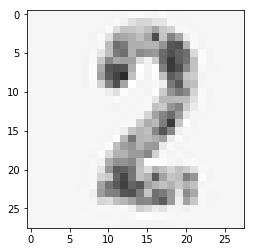

In [6]:
import PIL
import matplotlib.pyplot
%matplotlib inline

im = PIL.Image.open("./img/2.jpg")
matplotlib.pyplot.imshow(im.resize((28, 28), PIL.Image.ANTIALIAS).convert('L'), cmap='Greys', interpolation='None')